# 1

Autoregressive (AR) and Moving Average (MA) models are both used in time series analysis, but they have some key differences.
 

 An AR model predicts future values based on a linear combination of *past values* of the series. It assumes the current value is correlated with its own previous values. The order *p* means we use *p* previous lags. So, an AR(*p*) model can be represented as:
 

 $$y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \epsilon_t$$
 

 where $c$ is a constant, $\phi_1, ..., \phi_p$ are the parameters of the model, and $\epsilon_t$ is white noise.
 

 On the other hand, a MA model uses *past forecast errors* in a regression-like model. It suggests that the current value depends on recent errors. A MA model of order *q*, MA(*q*), is represented as:
 

 $$y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q}$$
 

 where $\mu$ is the mean of the series, $\theta_1, ..., \theta_q$ are the parameters, and $\epsilon_i$ terms are white noise error terms.
 

 In summary, AR uses past *values* of the time series. Whereas, MA uses past *errors*. Both try to capture different kinds of patterns from time series.
 

  


# 2
## (a)
 Model (1): $y_t = y_{t-1} + u_t$ is a Random Walk, it is also a special case of an AR(1) model, where the autoregressive parameter = 1.
 

 Model (2): $y_t = 0.5y_{t-1} + u_t$ is an AR(1) model.
 

 Model (3): $y_t = 0.8u_{t-1} + u_t$ is a MA(1) model.
 

## (b)
 

 For Model (1) which is a random walk, the autocorrelation function (ACF) will show very slow decay. It theoretically stays at 1, for all lags, but will stay very high.
 

 For Model (2) which is an AR(1), the ACF will decay exponentially. The decay rate depends on the coefficient, 0.5 in this case.
 

 For Model (3), a MA(1), the ACF will have a significant autocorrelation at lag 1 (related to the 0.8 coefficient) and will be (close to) zero for all other lags.
 

## (c)
 

 Model (1) is more likely to represent stock prices from a theoretical perspective because it is a random walk which is linked with the Efficient Market Hypothesis (EMH). EMH suggests that price changes are random and unpredictable.
 

 If model (2) or (3) truly represented how the stock market moved, we can potentially generate profit by forecasting future values. This because these models have parameters that suggest dependence on past values or past errors.
 

 ## (d)
 

 Model (1): $y_t = y_{t-1} + u_t$ shows, shocks are persistent and will not decay. if we substitute repeatedly, we get $y_t = y_0 + \sum_{i=1}^{t} u_i$, implying current value is influenced by all previous shocks and initial value, and that, there is no decay, so shock at i=1 has same impact as i=t.
 

 Model (2): $y_t = 0.5y_{t-1} + u_t$ persistence of the shock decays exponentially. If we substitute repeatedly, we get
 $y_t = u_t + 0.5u_{t-1} + 0.5^2u_{t-2} + ... $ , so the influence of shocks decreases exponentially over time.
 

 Model (3): $y_t = 0.8u_{t-1} + u_t$, shocks only last for two time periods.
 

 $y_{t+1} = 0.8 u_t + u_{t+1}$.
 

 $y_{t+2} = 0.8u_{t+1} + u_{t+2}$.
 

 It's clear, impact of $u_t$ is visible until $t+1$. In MA(1) models like this one, shocks only have an effect of order of the model, in this case, it's 1.

# 3
**(a)**

The ACF is decaying, and the PACF has a significant spike at lag 1 and then becomes mostly insignificant. This pattern suggests an AR(1) model. The ACF does not cut off sharply, which would suggest a Moving Average process, and the partial autocorrelation function (PACF) does not decay, so higher AR models don't appear to be appropriate.

**(b)**

We can use the Ljung-Box Q\* statistic to test if first 3 autocorrelations are jointly zero. The formula is:

$$Q^* = T(T+2)\sum_{k=1}^{m} \frac{\hat{\rho_k^2}}{T-k}$$

where *T* is the sample size, *m* is the number of lags being tested, and $\hat{\rho_k}$ is the sample autocorrelation at lag *k*. In our case, T = 100, m = 3, and we have the sample autocorrelations.

$$ Q^* = 100(100+2) \cdot (\frac{0.420^2}{100-1} + \frac{0.104^2}{100-2} + \frac{0.032^2}{100-3})$$

$$ Q^* = 10200 \cdot (\frac{0.1764}{99} + \frac{0.010816}{98} + \frac{0.001024}{97})$$

$$ Q^* = 10200 \cdot (0.0017818 + 0.0001104 + 0.0000106)$$

$$ Q^* = 10200 \cdot (0.0019028)$$

$$ Q^* = 19.408$$
 The test statistic follows a $\chi^2$ distribution with *m* degrees of freedom, so with m = 3 in our case.
 

 Using a chi-squared table, we can compare this to our alpha.

In [17]:
from scipy.stats import chi2

alpha = 0.05  #Significance Level
df = 3      #degrees of freedom

critical_value = chi2.ppf(1 - alpha, df)
print(f"Code output: {critical_value}")

Code output: 7.814727903251179


Since the Q\* statistic (19.408) is much larger than the critical value (7.815 at 5% significance level, with 3 dof), we reject the null hypothesis that the first three autocorrelation coefficients are jointly zero.

# 4
An AR(2) model is stationary if the roots of its characteristic equation lie outside the unit circle, or, equivalently, if the inverse roots lie within the unit circle.
 

 The AR(2) model is $y_t = 0.803y_{t-1} + 0.682y_{t-2} + u_t$.
 

 We can rewrite that as
 $y_t - 0.803y_{t-1} - 0.682y_{t-2} = u_t$
 

 The characteristic equation is:
 

 $1 - 0.803z - 0.682z^2 = 0$.
 

  Or,
 $z^2 -0.803z - 0.682 =0$ if it's changed to characteristic polynomial.
 

 We can use the quadratic formula to find the roots:
 $$z = \frac{0.803 \pm 1.83652}{2}$$
 $$z_1 = \frac{0.803 + 1.83652}{2} = 1.31976$$
 

 $$z_2 = \frac{0.803 - 1.83652}{2} = -0.51676$$
 We can say that since absolute values for the roots ($|z_1|$ ,$|z_2|$) are not both less than 1 ($1.31976 > 1$), model is not stationary.

# 5

To determine the "optimal" model order, we can use information criteria, such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC). These criteria balance the goodness of fit (measured by the log-likelihood, related to the residual variance) with model complexity (number of parameters). Lower values of the information criteria indicate a better model.

Since we are given $\log(\hat{\sigma}^2)$, and not the actual log-likelihood, we need to calculate the criteria from it. The number of parameters is *p + q + 1* (including the constant term and the variance). The formulas are:

$AIC = T \cdot \log(\hat{\sigma}^2) + 2k$

$BIC = T \cdot \log(\hat{\sigma}^2) + k \cdot \log(T)$

where *T* is the number of observations (200 here) and *k* is the number of parameters (*p + q + 1*).

In [18]:
import numpy as np
import pandas as pd

log_sigma_sq = {
    (0, 0): 0.932,
    (1, 0): 0.864,
    (0, 1): 0.902,
    (1, 1): 0.836,
    (2, 1): 0.801,
    (1, 2): 0.821,
    (2, 2): 0.789,
    (3, 2): 0.773,
    (2, 3): 0.782,
    (3, 3): 0.764
}

T = 200

def calculate_criteria(log_sigma_sq, p, q, T):
  k = p + q + 1
  aic = T * log_sigma_sq + 2 * k
  bic = T * log_sigma_sq + k * np.log(T)
  return aic, bic

results = {}
for (p, q), log_sigma in log_sigma_sq.items():
    aic, bic = calculate_criteria(log_sigma, p, q, T)
    results[(p, q)] = {'AIC': aic, 'BIC': bic}

df = pd.DataFrame(results).T
print(df.to_latex())

\begin{tabular}{llrr}
\toprule
 &  & AIC & BIC \\
\midrule
0 & 0 & 188.400000 & 191.698317 \\
\cline{1-4}
1 & 0 & 176.800000 & 183.396635 \\
\cline{1-4}
0 & 1 & 184.400000 & 190.996635 \\
\cline{1-4}
1 & 1 & 173.200000 & 183.094952 \\
\cline{1-4}
2 & 1 & 168.200000 & 181.393269 \\
\cline{1-4}
1 & 2 & 172.200000 & 185.393269 \\
\cline{1-4}
2 & 2 & 167.800000 & 184.291587 \\
\cline{1-4}
3 & 2 & 166.600000 & 186.389904 \\
\cline{1-4}
2 & 3 & 168.400000 & 188.189904 \\
\cline{1-4}
3 & 3 & 166.800000 & 189.888222 \\
\cline{1-4}
\bottomrule
\end{tabular}



The model with the lowest AIC is ARMA(3, 2). The model with the lowest BIC is ARMA(2, 1). BIC penalizes more number of parameters more, so it's natural to suggest less order. Choosing between (3,2) and (2,1) depends on how much parsimony we are going for. We are probably safer choosing (2,1) based on BIC.


# 6

## (a)

The ARMA(1,1) model is given by:

$y_t = 0.036 + 0.69y_{t-1} + 0.42u_{t-1} + u_t$

We are given $y_{t-1} = 3.4$ and $u_{t-1} = -1.3$. We need to forecast $y_t$, $y_{t+1}$, and $y_{t+2}$. Crucially, since $u_t$ is a white noise process, its expected value is zero, i.e., $E[u_t] = 0$, $E[u_{t+1}] = 0$, etc.

*   **Forecast for time t,  ($\hat{y}_t$):**

    $\hat{y}_t = E[y_t | y_{t-1}, u_{t-1}] = 0.036 + 0.69y_{t-1} + 0.42u_{t-1} + E[u_t]$

    $\hat{y}_t = 0.036 + 0.69(3.4) + 0.42(-1.3) + 0$

    $\hat{y}_t = 0.036 + 2.346 - 0.546$

    $\hat{y}_t = 1.836$

*   **Forecast for time t+1, ($\hat{y}_{t+1}$):**

    $\hat{y}_{t+1} = E[y_{t+1} | y_{t-1}, u_{t-1}] = 0.036 + 0.69E[y_t] + 0.42E[u_t] + E[u_{t+1}]$

    $\hat{y}_{t+1} = 0.036 + 0.69\hat{y}_t + 0.42(0) + 0$

    $\hat{y}_{t+1} = 0.036 + 0.69(1.836)$

    $\hat{y}_{t+1} = 0.036 + 1.26684$

    $\hat{y}_{t+1} = 1.30284$
    $\hat{y}_{t+1} \approx 1.303$

*   **Forecast for time t+2, ($\hat{y}_{t+2}$):**

    $\hat{y}_{t+2} = E[y_{t+2} | y_{t-1}, u_{t-1}] = 0.036 + 0.69E[y_{t+1}] + 0.42E[u_{t+1}] + E[u_{t+2}]$

    $\hat{y}_{t+2} = 0.036 + 0.69\hat{y}_{t+1} + 0 + 0$

    $\hat{y}_{t+2} = 0.036 + 0.69(1.30284)$

    $\hat{y}_{t+2} = 0.036 + 0.89896$

    $\hat{y}_{t+2} = 0.9349596 \approx 0.935$

## (b)

The actual values are given as $y_t = -0.032$, $y_{t+1} = 0.961$, and $y_{t+2} = 0.203$.

The forecast errors are:

*   $e_t = y_t - \hat{y}_t = -0.032 - 1.836 = -1.868$
*   $e_{t+1} = y_{t+1} - \hat{y}_{t+1} = 0.961 - 1.30284 = -0.34184$
*   $e_{t+2} = y_{t+2} - \hat{y}_{t+2} = 0.203 - 0.9349596= -0.7319596$

The squared errors are:

*   $e_t^2 = (-1.868)^2 = 3.489424$
*   $e_{t+1}^2 = (-0.34184)^2 = 0.1168545856$
*   $e_{t+2}^2 = (-0.7319596)^2 = 0.53576487$

The Mean Squared Error (MSE) is the average of the squared errors:

$MSE = \frac{1}{3}(e_t^2 + e_{t+1}^2 + e_{t+2}^2)$

$MSE = \frac{1}{3}(3.489424 + 0.1168545856 + 0.53576487)$

$MSE = \frac{1}{3}(4.142043) \approx 1.381$

Therefore, the out-of-sample MSE is approximately 1.381.

# 7

View the code in the attached notebook.

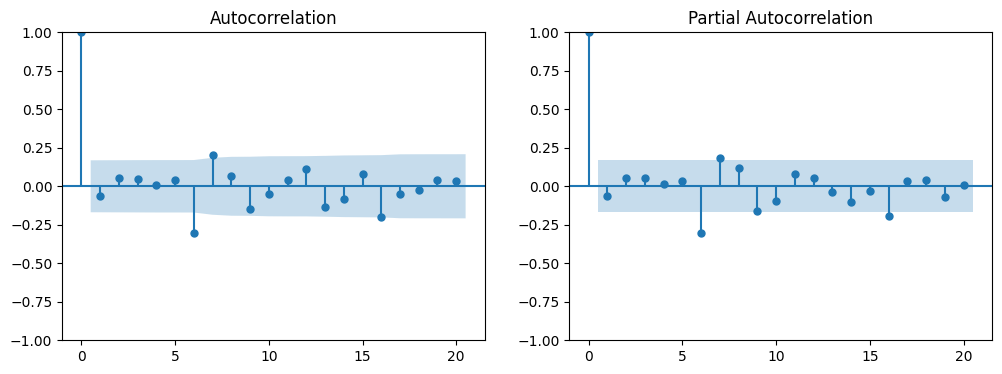

\begin{tabular}{lrr}
\toprule
 & AIC & BIC \\
(p,q) &  &  \\
\midrule
(0, 0) & -115.208 & -109.397 \\
(0, 1) & -113.644 & -104.929 \\
(0, 2) & -112.109 & -100.488 \\
(0, 3) & -110.785 & -96.258 \\
(0, 4) & -108.791 & -91.360 \\
(0, 5) & -107.107 & -86.770 \\
(1, 0) & -113.693 & -104.977 \\
(1, 1) & -111.815 & -100.194 \\
(1, 2) & -110.383 & -95.857 \\
(1, 3) & -111.576 & -94.144 \\
(1, 4) & -109.622 & -89.285 \\
(1, 5) & -111.240 & -87.997 \\
(2, 0) & -112.046 & -100.424 \\
(2, 1) & -111.848 & -97.321 \\
(2, 2) & -114.239 & -96.807 \\
(2, 3) & -118.812 & -98.475 \\
(2, 4) & -122.934 & -99.692 \\
(2, 5) & -120.995 & -94.848 \\
(3, 0) & -110.396 & -95.869 \\
(3, 1) & -108.411 & -90.979 \\
(3, 2) & -106.407 & -86.070 \\
(3, 3) & -114.588 & -91.346 \\
(3, 4) & -120.951 & -94.803 \\
(3, 5) & -125.365 & -96.312 \\
(4, 0) & -108.415 & -90.984 \\
(4, 1) & -106.418 & -86.081 \\
(4, 2) & -114.794 & -91.552 \\
(4, 3) & -114.163 & -88.016 \\
(4, 4) & -124.268 & -95.215 \\
(4, 5) & -124.862 & -92.9

In [19]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore") # We get a lot of warnings from statsmodels, but this it should still work

excel_file = pd.ExcelFile('../1/capm.xlsx')
df = excel_file.parse('table')

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.set_index('Date')

series1 = 'FORD'
series2 = 'MICROSOFT'

df[f'Return_{series1}'] = np.log(df[series1] / df[series1].shift(1))
df[f'Return_{series2}'] = np.log(df[series2] / df[series2].shift(1))
df = df.dropna()

returns = df[f'Return_{series1}']

# (a)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
smt.graphics.plot_acf(returns, lags=20, ax=axes[0])
smt.graphics.plot_pacf(returns, lags=20, ax=axes[1], method='ywm')
plt.show()

# (b)

def calculate_information_criteria(data, p, q):
    model = ARIMA(data, order=(p, 0, q)).fit()
    return model.aic, model.bic

aic_values = {}
bic_values = {}

for p in range(6):
    for q in range(6):
        aic, bic = calculate_information_criteria(returns, p, q)
        aic_values[(p, q)] = aic
        bic_values[(p, q)] = bic

aic_df = pd.DataFrame(list(aic_values.items()), columns=['(p,q)', 'AIC'])
bic_df = pd.DataFrame(list(bic_values.items()), columns=['(p,q)', 'BIC'])

print(pd.concat([aic_df.set_index('(p,q)'), bic_df.set_index('(p,q)')], axis=1).to_latex(float_format="%.3f"))

best_aic_model = min(aic_values, key=aic_values.get)
best_bic_model = min(bic_values, key=bic_values.get)

print(f"\nBest model based on AIC: ARMA{best_aic_model}\n")
print(f"Best model based on BIC: ARMA{best_bic_model}")

# (c)
p_chosen = best_bic_model[0]
q_chosen = best_bic_model[0]
chosen_order = (p_chosen, q_chosen)

train_data = returns[:-5]

chosen_model = ARIMA(train_data, order=(chosen_order[0], 0, chosen_order[1])).fit()
print("\n--- Chosen Model Summary ---")
print(chosen_model.summary().as_latex())

# (d)
test_data = returns[-5:]
holdout_prices = df[series1][-5:]

# (d)(i)
def arma_forecast(model, _, steps):
    forecasts = model.forecast(steps=steps)
    return forecasts

chosen_model_forecasts = arma_forecast(chosen_model, train_data, len(test_data)) # Use chosen_model directly
chosen_model_forecasts = pd.Series(chosen_model_forecasts, index=test_data.index) # Ensure index alignment


# (d)(ii)
arma11_model = ARIMA(train_data, order=(1, 0, 1)).fit()
arma11_forecasts = arma_forecast(arma11_model, train_data, len(test_data))
arma11_forecasts = pd.Series(arma11_forecasts, index=test_data.index) # Ensure index alignment


# (d)(iii)
drift = train_data.mean()

last_log_price = np.log(df[series1].iloc[-6])
rw_forecasts = [last_log_price + drift * (i + 1) for i in range(len(test_data))]
rw_forecasts_returns = np.diff(rw_forecasts, prepend=np.log(train_data[-1]))
rw_forecasts_returns = pd.Series(rw_forecasts_returns, index=test_data.index) # Ensure index alignment


def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)

    correct_sign = np.sum(np.sign(actual) == np.sign(predicted)) / len(actual) * 100

    return mse, mae, mape, correct_sign


chosen_mse, chosen_mae, chosen_mape, chosen_sign = calculate_metrics(test_data, chosen_model_forecasts)
arma11_mse, arma11_mae, arma11_mape, arma11_sign = calculate_metrics(test_data, arma11_forecasts)
rw_mse, rw_mae, rw_mape, rw_sign = calculate_metrics(test_data, rw_forecasts_returns)
evaluation_metrics = pd.DataFrame({
    'Model': ['Chosen ARMA(0,0)', 'ARMA(1,1)', 'Random Walk'],
    'MSE': [chosen_mse, arma11_mse, rw_mse],
    'MAE': [chosen_mae, arma11_mae, rw_mae],
    'MAPE': [chosen_mape, arma11_mape, rw_mape],
    'Correct Sign': [chosen_sign, arma11_sign, rw_sign]
})

print("\n--- Forecasting Evaluation ---\n")
print(evaluation_metrics.to_latex(index=False, float_format="%.1f"))

# 8

## (a)

Non-stationary variables are those whose statistical properties (mean, variance) change over time. Examples include economic series like GDP and inflation, which often exhibit trends, and stock prices or exchange rates, which might follow random walks. Demographic data and cumulative measures like rainfall also tend to be non-stationary. To address this, several techniques are used. Differencing (calculating the difference between consecutive observations) is common for removing trends. Transformations like taking the logarithm can stabilize the variance. Detrending, by fitting a regression model with time as a predictor, is suitable for deterministic trends. Decomposition separates the series into components, allowing separate modeling of the stationary residual, and filtering methods can also be applied.

## (b)

Testing for non-stationarity is crucial before building time series models. Regressing non-stationary variables on each other can lead to spurious regression, producing misleadingly significant results. Standard statistical tests assume stationarity; applying them to non-stationary data yields unreliable results. Model misspecification occurs when models designed for stationary data are used on non-stationary series, resulting in poor forecasts. The autocorrelation function (ACF) of non-stationary data can also be misinterpreted, leading to incorrect conclusions.

## (c)
Weak stationarity means the mean and variance are constant over time, and the autocovariance depends only on the lag. It's the most common definition, focusing on the first two moments. Strict stationarity is a stronger condition: the entire probabilistic behavior of the series is time-invariant. A deterministic trend is a non-random, predictable function of time, often a linear trend. A stochastic trend, like a random walk, is itself a random process where the current value depends on the previous value plus a random shock. Differencing is used to handle stochastic trends, whereas regression is used for deterministic trends.